# The following is an EDA of a Kaggle Data Set about Steam Games

In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the data
# Steam Games Dataset
# From https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset
steam_games_df = pd.read_csv('C:/Users/jerem/Desktop/DAI/daimil10/projects/mid_course/data/steam_games_dataset.csv')

# Main Goals of the Project
1. Objective of EDA  
    a. Find correlation of metacritic / reviewer score with time played of game (specifically, time to beat if beat, completion, etc)  
    b. If an correlation exists with high metacritic vs. low reviewer score or contrapositive  
2. Relavent Data  
    a. Steam APIs used from researchers and published on Kaggle  
3. Explore the Data  
    a. Reduced 68K rows to less than 3K to include only games that had metacritic and reviewer score  
4. Clean the Data  
    a. Refined data to eliminate game ID, removed all but the first Tag reference for the game  
5. Analysis  
    a. Realized assessment based on the game tag will be biased as the first tag is only one of many and scrubbing based on sub tags is beyond the scope of this EDA as there is a weight measurment per sub tag (Due to Steams weight tag scale and user bias)  
    b. Need to expand on positivity ratio    
6. I want to present top 25 and bottom 25 games based on metacritic and user scores. Find any overlap between the two categories. Identify outliers if necessary. Correlate these findings to time to beat AVG and completionist to see if the higher or lower score leads to more completion or lower completion rates. If data allows.  
7. Recommendations at this time might be to use metacritic score as a baseline for inquiry into game and drive decision off of user input and reviews.     
8. Future research areas would be to deep dive into top / bottom 25 games each year and compile user review sentiment and provide correlation.   

# Things to do for Read Me
1. Background of:
    a. Steam  
    b. Metacritic Score  
    c. Reviewer Score  

2. Expand Main Goals of Project Draft:  
    a. Include links and images as necessary  
    b. Source links  

3. Organize presentation:  
    a. Create flow based on Goals  
    b. Select applicable visualizations / data  
    c. Draft presentation notes  

4. Prepare based off of
https://learn-2.galvanize.com/cohorts/4227/blocks/1707/content_files/units/00-midterm-project/02-successful-presentations.md

# Explanation of the Column Names
## Steam Games Dataset
### id: Game ID on steam platform

### name: Game name as appears on Steam platform  

### year: Release year  

### metacritic_rating: Metacritic rating (the larger the better)  

### reviewer_rating: Game rating given by users on the 0-10 scale (the larger the better)  

### positivity_ratio: Number of positive reviews divided by the number of negative reviews  

### to_beat_main: Time required to beat the main plot of the game    

### to_beat_extra: Time required to beat the main and optional objectives of the game  

### to_beat_completionist: Time required to complete every single objective of the game including gathering all collectibles  

### extra_content_length: The difference between completionist time and extra time  

In [21]:
# Initial DF info
steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63543 entries, 0 to 63542
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     63543 non-null  int64  
 1   name                   63543 non-null  object 
 2   year                   63443 non-null  float64
 3   metacritic_rating      3916 non-null   float64
 4   reviewer_rating        44629 non-null  float64
 5   positivity_ratio       61530 non-null  float64
 6   to_beat_main           17801 non-null  float64
 7   to_beat_extra          13427 non-null  float64
 8   to_beat_completionist  16036 non-null  float64
 9   extra_content_length   21182 non-null  float64
 10  tags                   63543 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [22]:
# Initial DF head
steam_games_df.head(10)

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
5,1301720,Escape Room - Der kranke Kollege,2020.0,NaN,8.0,6.828914,1.69,2.49,2.31,0.62,Horror|First-Person|Crime|Multiplayer|Adventur...
6,589870,Learn to Fly 3,2017.0,NaN,8.0,15.571125,3.02,6.35,11.78,8.76,Multiplayer|Strategy|Action|Adventure|Physics|...
7,736260,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror|Sokoban|Strategy|Level Editor|Pixel Gra...
8,585420,Trailmakers,2019.0,NaN,8.0,11.906299,12.18,85.26,406.74,394.56,Robots|Co-op Campaign|Automobile Sim|Action-Ad...
9,1455840,Dorfromantik,2022.0,NaN,9.0,32.146377,5.25,13.60,63.94,58.69,Procedural Generation|Strategy|Soundtrack|Atmo...


In [23]:
# Removing Game ID
sg_no_id_df = steam_games_df.drop('id', axis=1)
sg_no_id_df.head(10)

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
5,Escape Room - Der kranke Kollege,2020.0,NaN,8.0,6.828914,1.69,2.49,2.31,0.62,Horror|First-Person|Crime|Multiplayer|Adventur...
6,Learn to Fly 3,2017.0,NaN,8.0,15.571125,3.02,6.35,11.78,8.76,Multiplayer|Strategy|Action|Adventure|Physics|...
7,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror|Sokoban|Strategy|Level Editor|Pixel Gra...
8,Trailmakers,2019.0,NaN,8.0,11.906299,12.18,85.26,406.74,394.56,Robots|Co-op Campaign|Automobile Sim|Action-Ad...
9,Dorfromantik,2022.0,NaN,9.0,32.146377,5.25,13.60,63.94,58.69,Procedural Generation|Strategy|Soundtrack|Atmo...


In [24]:
# Function to truncate tags to the first words
def truncate_tags(tags):
    return '|'.join(tags.split('|')[:1])

# Apply the function to the tags column
sg_no_id_trunc_tags_df = sg_no_id_df.copy()
sg_no_id_trunc_tags_df['tags'] = sg_no_id_trunc_tags_df['tags'].apply(truncate_tags)

# Display the first few rows of the updated DataFrame
sg_no_id_trunc_tags_df.head()

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich
1,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror
2,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer
3,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror
4,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation


In [25]:
# Create a new DataFrame with rows that have non-null values for both metacritic_rating and reviewer_rating
filtered_df = sg_no_id_trunc_tags_df.dropna(subset=['metacritic_rating', 'reviewer_rating'])

# Display the first few rows of the filtered DataFrame
filtered_df.head()

# Display the number of rows in the filtered DataFrame
# print(f"Number of rows in the filtered DataFrame: {len(filtered_df)}")

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich
2,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer
3,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror
4,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation
7,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror


# Below Data is steam games cleaned with no NaN values  
# Removed 'id' and truncated 'tags'    
# sg_cleaned_df

In [26]:
# Remove rows with NaN values in any column
sg_cleaned_df = filtered_df.dropna()

# Display the first few rows of the updated DataFrame
sg_cleaned_df.head()

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich
3,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror
4,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation
7,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror
11,Human Resource Machine,2015.0,78.0,8.0,15.220833,4.18,7.57,9.52,5.34,Automation


# Export  
sg_cleaned_df.to_csv(# Where I want to drop it folder name)  
Then load csv in new notebook

In [27]:
sg_cleaned_df.head(10)

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich
3,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror
4,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation
7,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror
11,Human Resource Machine,2015.0,78.0,8.0,15.220833,4.18,7.57,9.52,5.34,Automation
14,Opus Magnum,2017.0,90.0,9.0,37.977444,15.24,26.06,42.60,27.36,Automation
16,The Bridge,2013.0,74.0,8.0,7.037182,3.55,5.89,7.61,4.06,Side Scroller
23,The Dream Machine: Chapter 1 & 2,2012.0,75.0,8.0,7.204819,13.12,13.93,18.20,5.08,Horror
28,Lightmatter,2020.0,73.0,8.0,10.567961,3.90,4.44,6.00,2.10,First-Person
36,Mars Horizon,2020.0,71.0,8.0,5.299020,12.82,34.50,92.87,80.05,Historical


In [28]:
sg_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 0 to 63522
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   2823 non-null   object 
 1   year                   2823 non-null   float64
 2   metacritic_rating      2823 non-null   float64
 3   reviewer_rating        2823 non-null   float64
 4   positivity_ratio       2823 non-null   float64
 5   to_beat_main           2823 non-null   float64
 6   to_beat_extra          2823 non-null   float64
 7   to_beat_completionist  2823 non-null   float64
 8   extra_content_length   2823 non-null   float64
 9   tags                   2823 non-null   object 
dtypes: float64(8), object(2)
memory usage: 242.6+ KB


In [29]:
sg_cleaned_df.describe()

,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,2015.433581,74.408785,7.250089,8.958565,13.299267,22.274499,57.043022,43.743755
std,4.117055,9.737233,1.315211,9.636600,26.557949,49.839411,348.626211,339.724565
min,1997.000000,23.000000,1.000000,0.201999,0.220000,0.290000,0.370000,0.030000
25%,2013.000000,69.000000,6.000000,3.148366,4.300000,6.095000,8.935000,3.125000
50%,2016.000000,76.000000,8.000000,5.945946,7.900000,11.010000,16.770000,8.650000
75%,2019.000000,81.000000,8.000000,11.219236,14.715000,23.065000,40.910000,24.470000
max,2023.000000,97.000000,9.000000,133.230000,697.940000,1181.120000,15316.170000,15313.270000


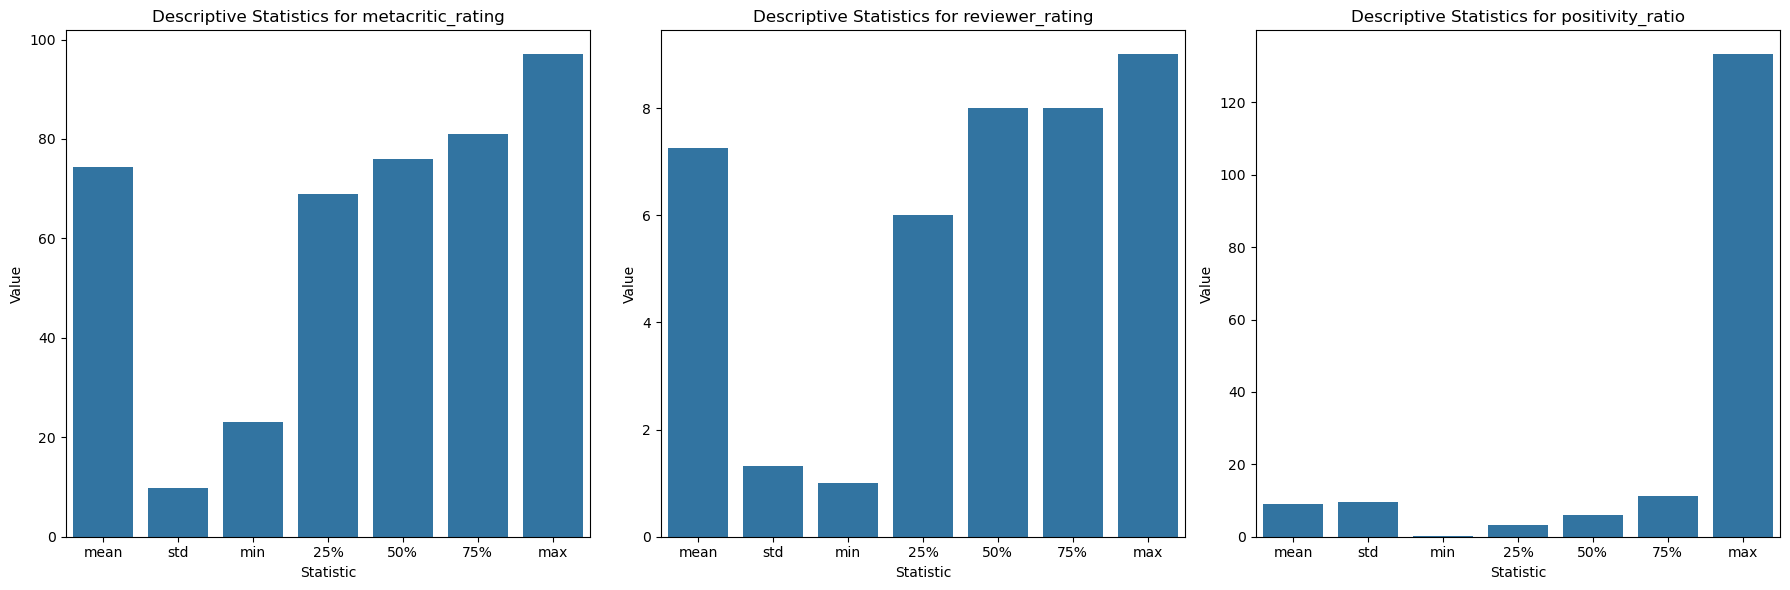

In [30]:
# Get the descriptive statistics for the specified columns
desc_stats = sg_cleaned_df[['metacritic_rating', 'reviewer_rating', 'positivity_ratio']].describe()

# Remove the 'count' row from the descriptive statistics
desc_stats = desc_stats.drop('count', axis=0)

# Transpose the DataFrame for easier plotting
desc_stats = desc_stats.transpose()

# Plot the descriptive statistics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, column in enumerate(desc_stats.index):
    sns.barplot(x=desc_stats.columns, y=desc_stats.loc[column], ax=axes[i])
    axes[i].set_title(f'Descriptive Statistics for {column}')
    axes[i].set_ylabel('Value')
    axes[i].set_xlabel('Statistic')

plt.tight_layout()
plt.show()

In [31]:
# Count of first Tag associated with the games
sg_cleaned_df['tags'].value_counts()

tags
Horror          568
Story Rich      482
First-Person    131
Platformer      129
Multiplayer     117
               ... 
Clicker           1
Party Game        1
Basketball        1
Spaceships        1
Superhero         1
Name: count, Length: 170, dtype: int64

In [32]:
# Count of first Tag associated with the games and metacritic_rating and reviewer_rating
tags_summary = sg_cleaned_df.groupby('tags').agg({
    'metacritic_rating': 'mean',
    'reviewer_rating': 'mean'
}).reset_index()

tags_summary.columns = ['tags', 'avg_metacritic_rating', 'avg_reviewer_rating']
tags_summary

,tags,avg_metacritic_rating,avg_reviewer_rating
0,1980s,68.555556,6.444444
1,3D Platformer,60.500000,6.000000
2,3D Vision,77.733333,7.533333
3,4X,80.729730,7.216216
4,6DOF,63.000000,6.000000
...,...,...,...
165,Visual Novel,70.444444,7.000000
166,Voice Control,68.000000,5.500000
167,Werewolves,73.000000,8.000000
168,World War I,70.250000,6.500000


In [33]:
# Sort the tags_summary DataFrame by avg_metacritic_rating
tags_summary_sorted_meta_c = tags_summary.sort_values(by=['avg_metacritic_rating',], ascending=(False))

tags_summary_sorted_meta_c
tags_summary = sg_cleaned_df.groupby('tags').agg({
    'metacritic_rating': 'mean',
    'reviewer_rating': 'mean'
}).reset_index()

tags_summary.columns = ['tags', 'avg_metacritic_rating', 'avg_reviewer_rating']
tags_summary_sorted_meta_c

,tags,avg_metacritic_rating,avg_reviewer_rating
99,On-Rails Shooter,89.0,8.0
130,Skateboarding,84.5,8.0
89,Metroidvania,83.0,8.5
68,Hero Shooter,82.0,8.0
127,Shop Keeper,82.0,9.0
...,...,...,...
150,Third-Person Shooter,52.0,5.0
37,Cyberpunk,46.0,5.0
144,Superhero,44.0,5.0
162,Underwater,39.0,4.0


In [34]:
# Sort the tags_summary DataFrame by avg_metacritic_rating
tags_summary_sorted_reviewer = tags_summary.sort_values(by=['avg_reviewer_rating',], ascending=(False))

tags_summary_sorted_reviewer
tags_summary = sg_cleaned_df.groupby('tags').agg({
    'metacritic_rating': 'mean',
    'reviewer_rating': 'mean'
}).reset_index()

tags_summary.columns = ['tags', 'avg_metacritic_rating', 'avg_reviewer_rating']
tags_summary_sorted_reviewer

,tags,avg_metacritic_rating,avg_reviewer_rating
48,Electronic Music,79.0,9.0
102,Party Game,80.0,9.0
34,Creature Collector,81.0,9.0
127,Shop Keeper,82.0,9.0
22,Card Game,78.0,9.0
...,...,...,...
104,Pirates,66.0,5.0
96,Mystery,63.5,5.0
146,Survival,74.0,4.0
157,Turn-Based,63.0,4.0


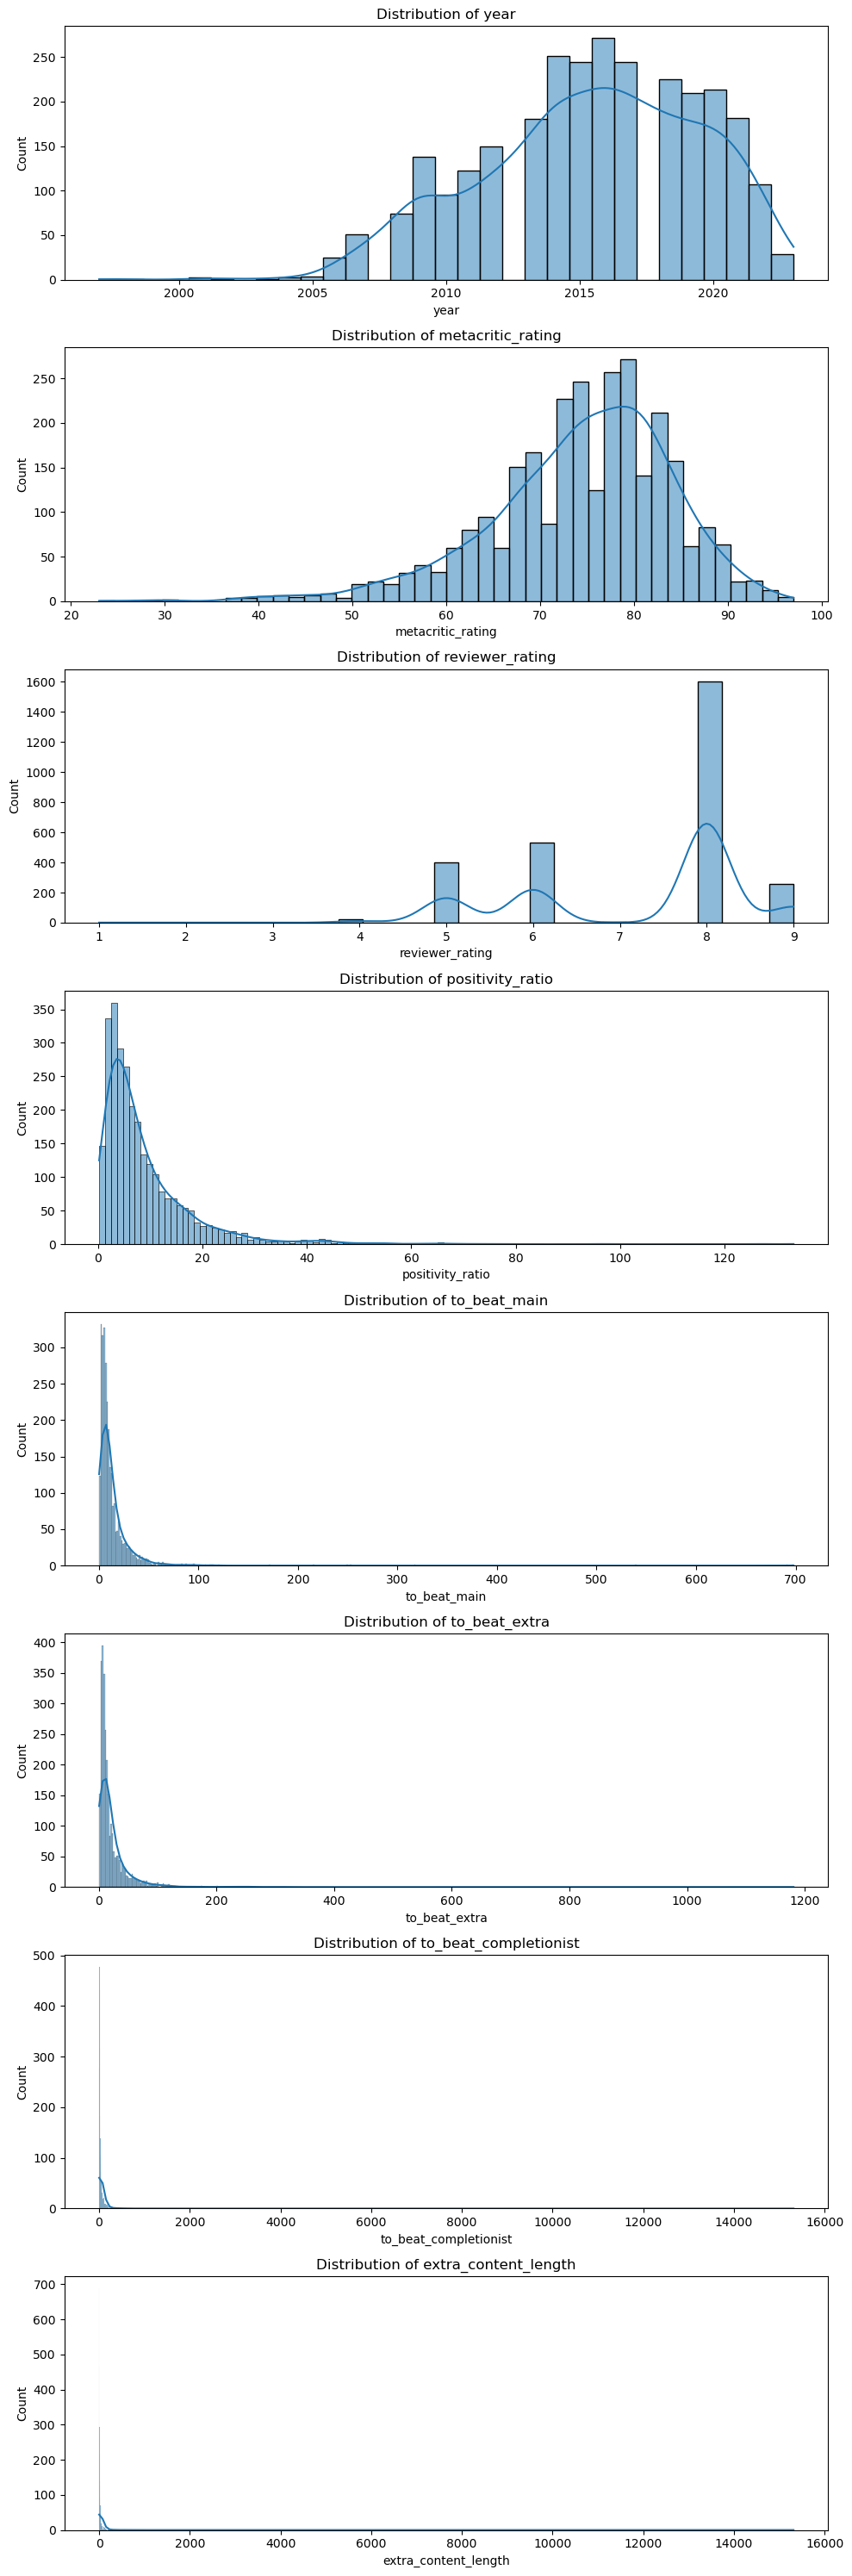

In [35]:
# Distribution of numerical features - Initial EDA
numerical_features = ['year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 30))
for i, feature in enumerate(numerical_features):
    sns.histplot(sg_cleaned_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

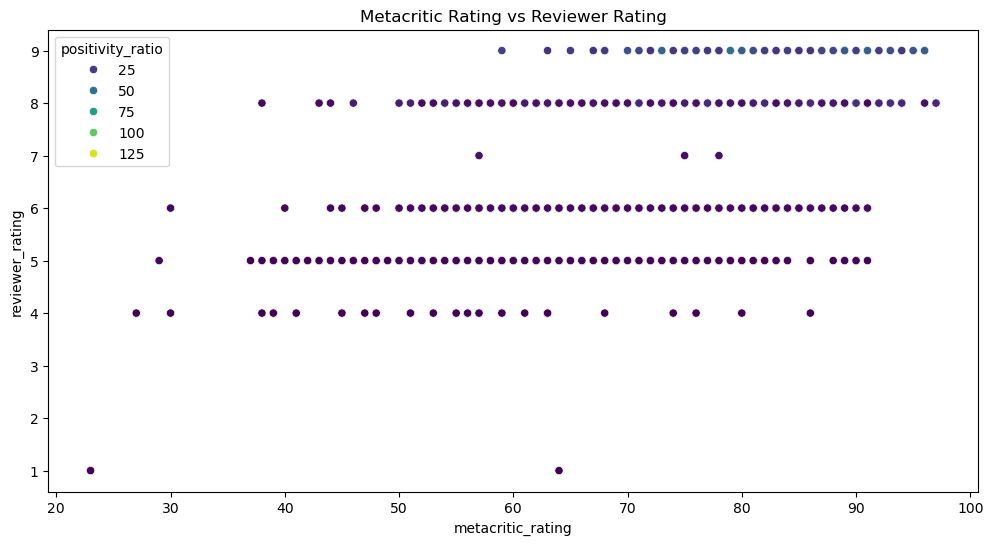

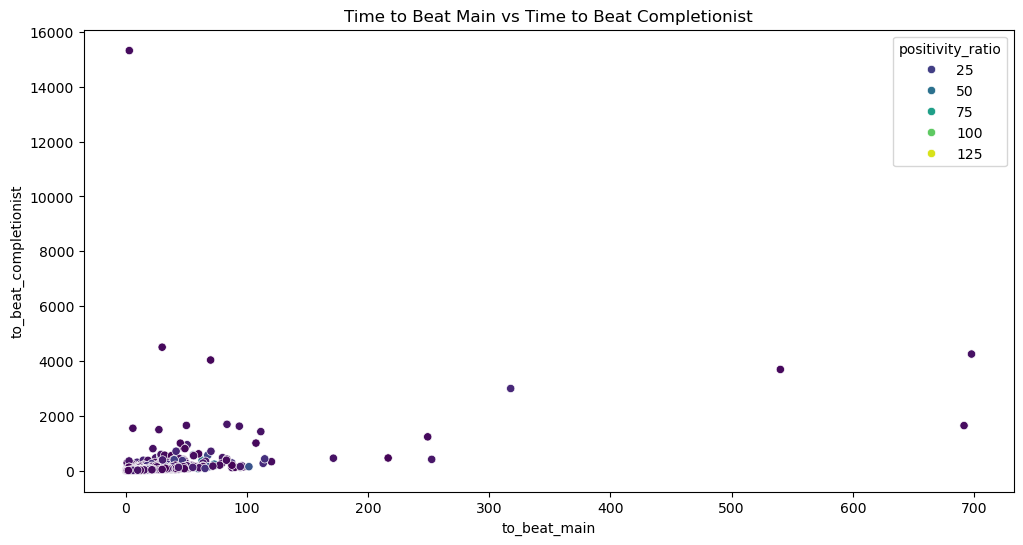

In [36]:
# Scatter plots for key relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sg_cleaned_df, x='metacritic_rating', y='reviewer_rating', hue='positivity_ratio', palette='viridis')
plt.title('Metacritic Rating vs Reviewer Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=sg_cleaned_df, x='to_beat_main', y='to_beat_completionist', hue='positivity_ratio', palette='viridis')
plt.title('Time to Beat Main vs Time to Beat Completionist')
plt.show()

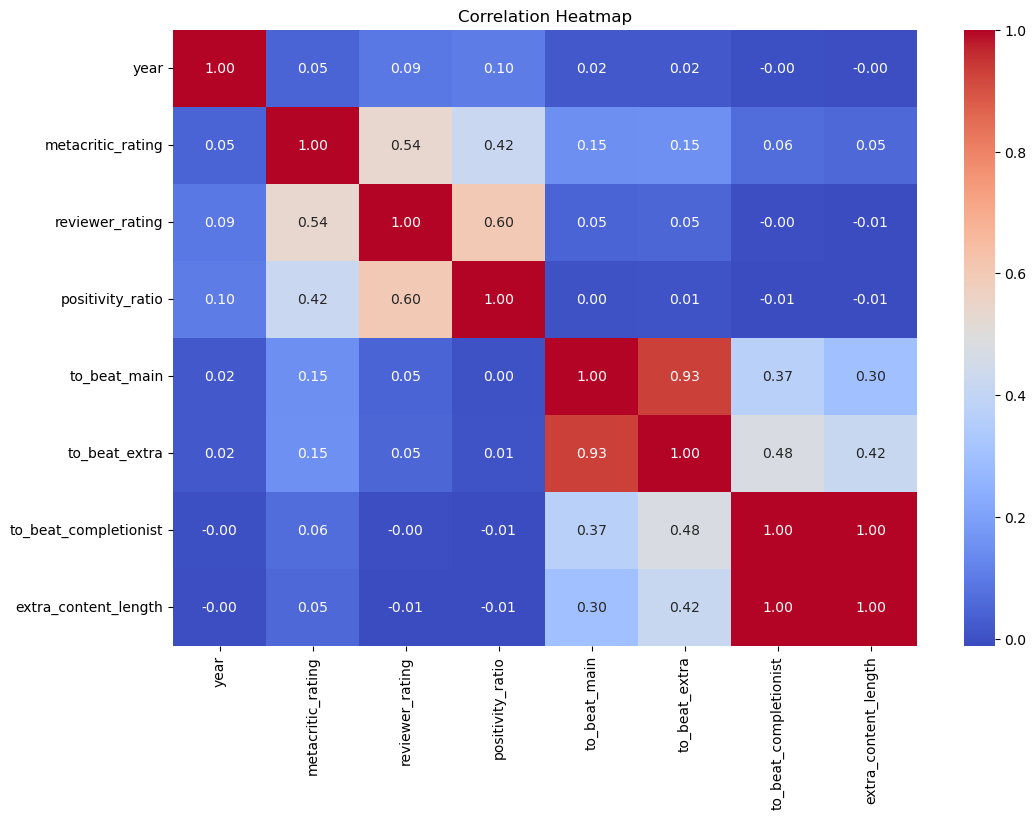

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = sg_cleaned_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

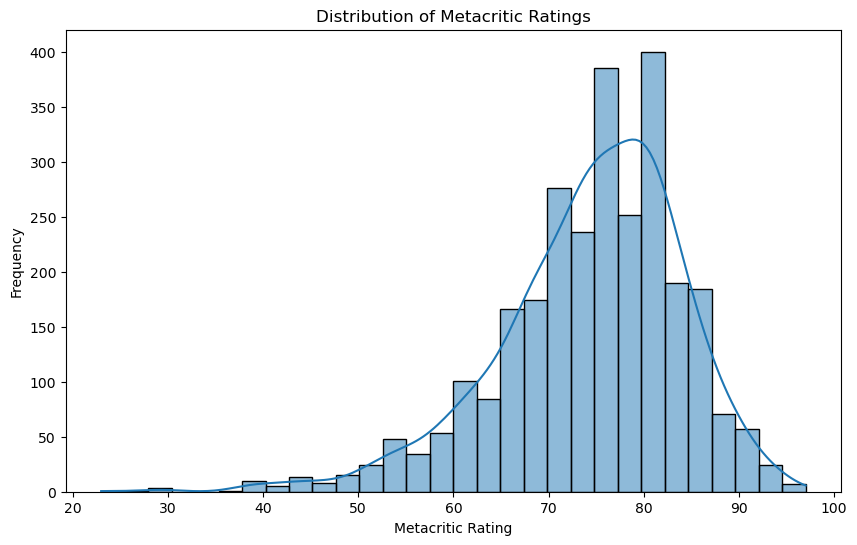

In [38]:
# Distribution of Metacritic Ratings
plt.figure(figsize=(10, 6))
sns.histplot(sg_cleaned_df['metacritic_rating'], kde=True, bins=30)
plt.title('Distribution of Metacritic Ratings')
plt.xlabel('Metacritic Rating')
plt.ylabel('Frequency')
plt.show()

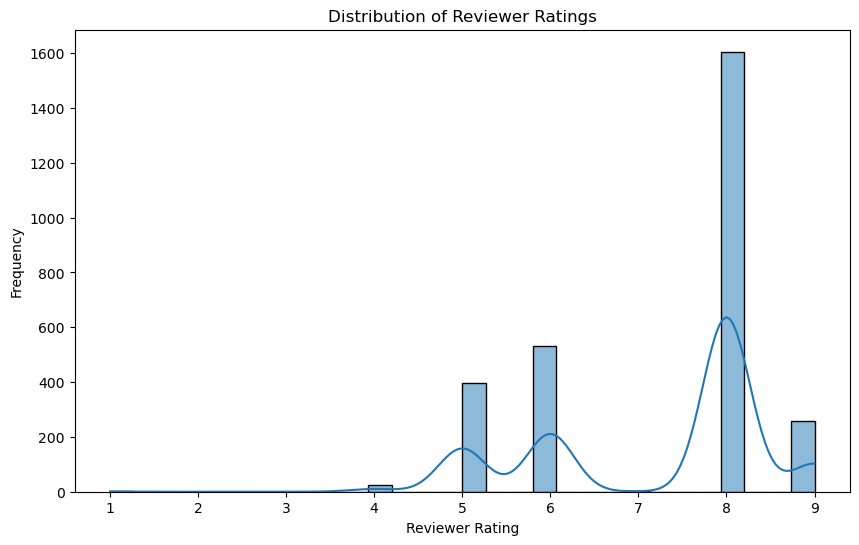

In [39]:
# Distribution of Reviewer Ratings
plt.figure(figsize=(10, 6))
sns.histplot(sg_cleaned_df['reviewer_rating'], kde=True, bins=30)
plt.title('Distribution of Reviewer Ratings')
plt.xlabel('Reviewer Rating')
plt.ylabel('Frequency')
plt.show()

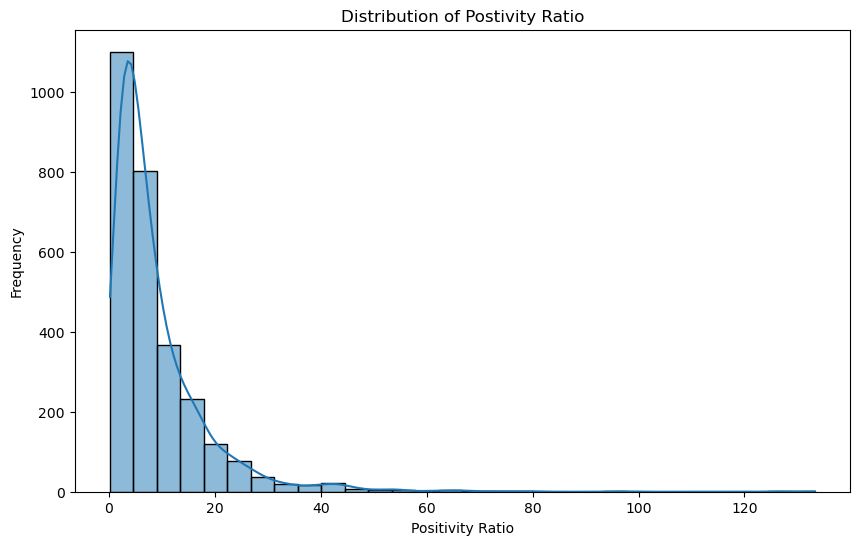

In [40]:
# Distribution of Positivity Ratio
plt.figure(figsize=(10, 6))
sns.histplot(sg_cleaned_df['positivity_ratio'], kde=True, bins=30)
plt.title('Distribution of Postivity Ratio')
plt.xlabel('Positivity Ratio')
plt.ylabel('Frequency')
plt.show()

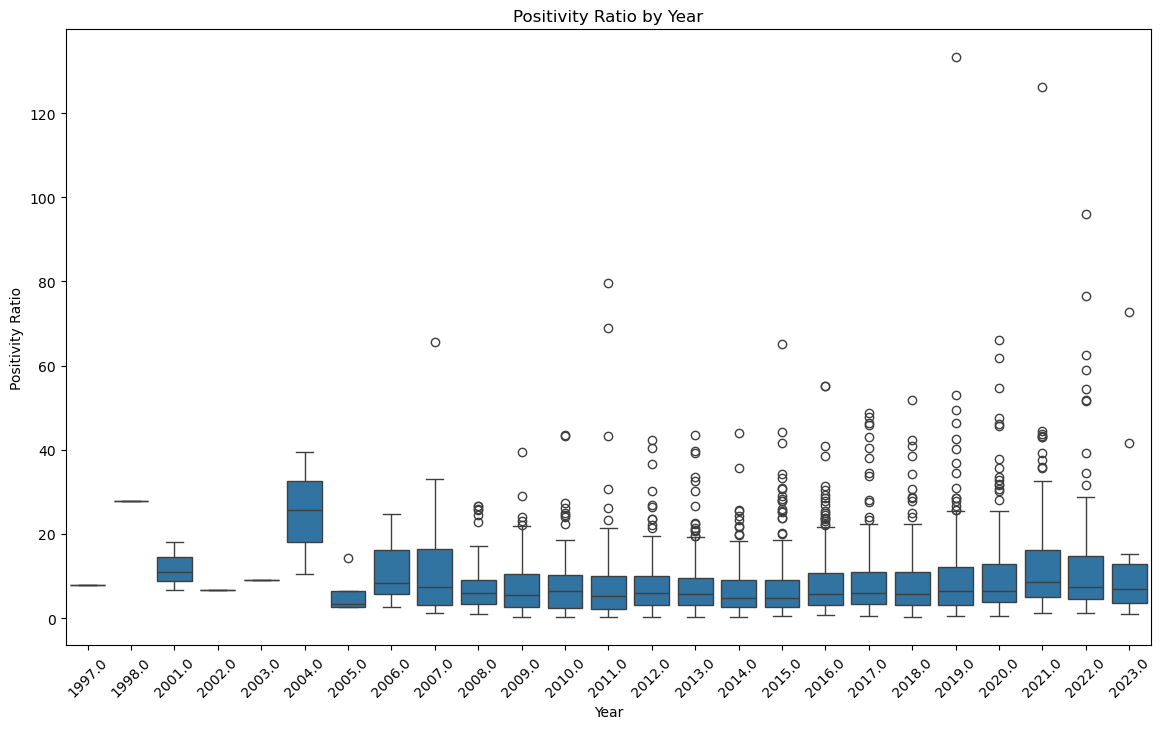

In [41]:
# Box plot of Positivity Ratio by Year
plt.figure(figsize=(14, 8))
sns.boxplot(data=sg_cleaned_df, x='year', y='positivity_ratio')
plt.title('Positivity Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Positivity Ratio')
plt.xticks(rotation=45)
plt.show()

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\509311234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_metacritic, x='metacritic_rating', y='name', palette='viridis')


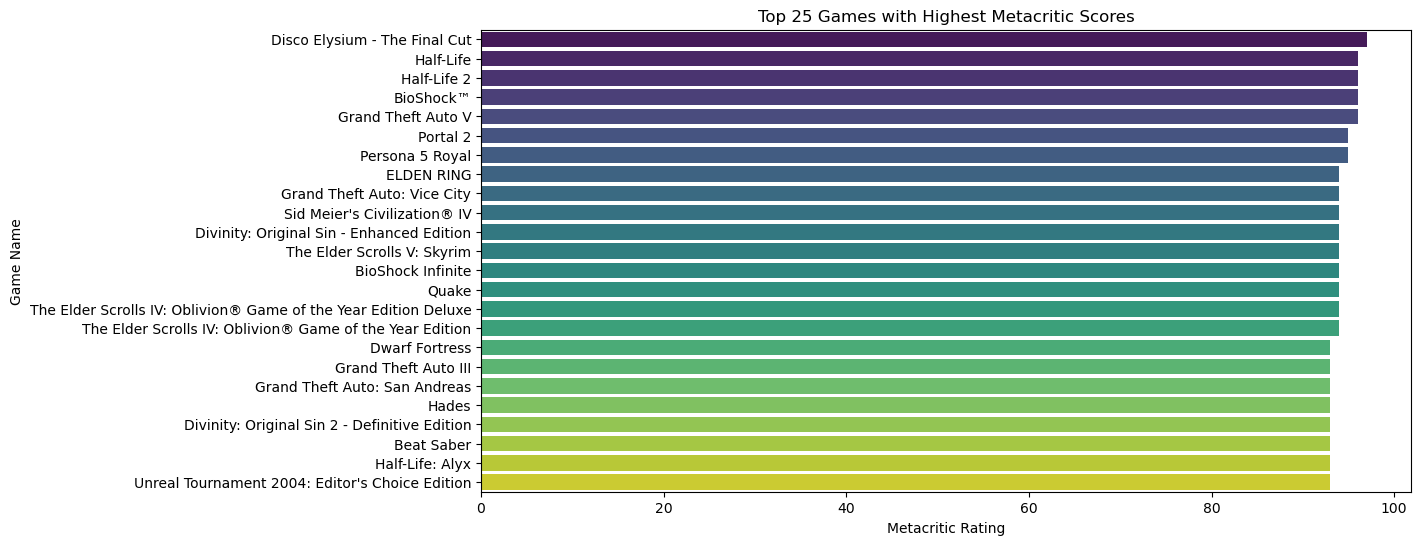

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\509311234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_reviewer, x='reviewer_rating', y='name', palette='viridis')


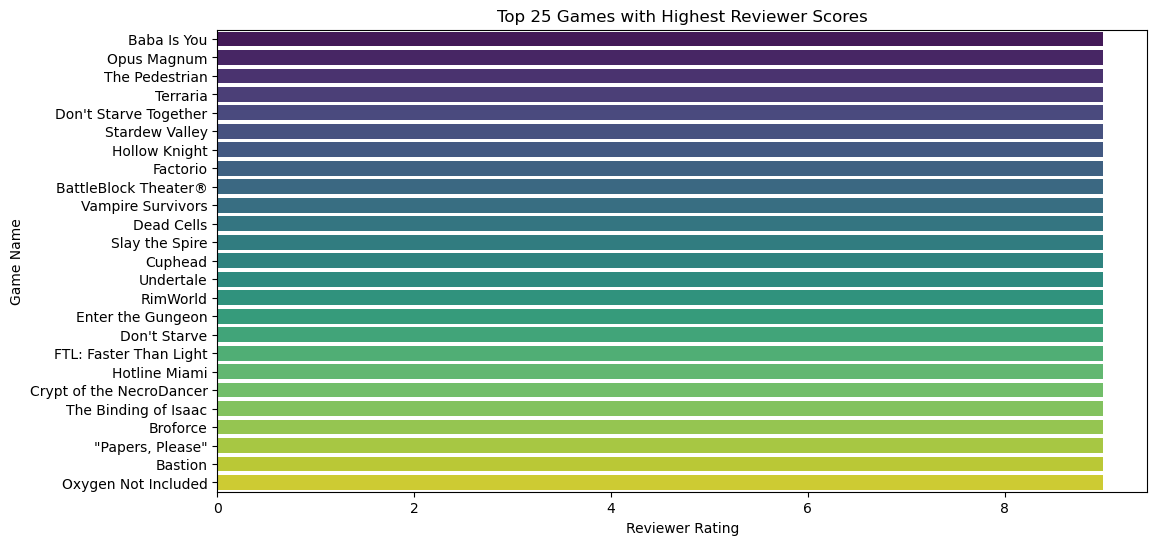

In [42]:
# Top 25 games with the highest Metacritic scores
top_25_metacritic = sg_cleaned_df.nlargest(25, 'metacritic_rating')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_25_metacritic, x='metacritic_rating', y='name', palette='viridis')
plt.title('Top 25 Games with Highest Metacritic Scores')
plt.xlabel('Metacritic Rating')
plt.ylabel('Game Name')
plt.show()

# Top 10 games with the highest Reviewer scores
top_25_reviewer = sg_cleaned_df.nlargest(25, 'reviewer_rating')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_25_reviewer, x='reviewer_rating', y='name', palette='viridis')
plt.title('Top 25 Games with Highest Reviewer Scores')
plt.xlabel('Reviewer Rating')
plt.ylabel('Game Name')
plt.show()

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\3918159980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_25_metacritic, x='metacritic_rating', y='name', palette='viridis')


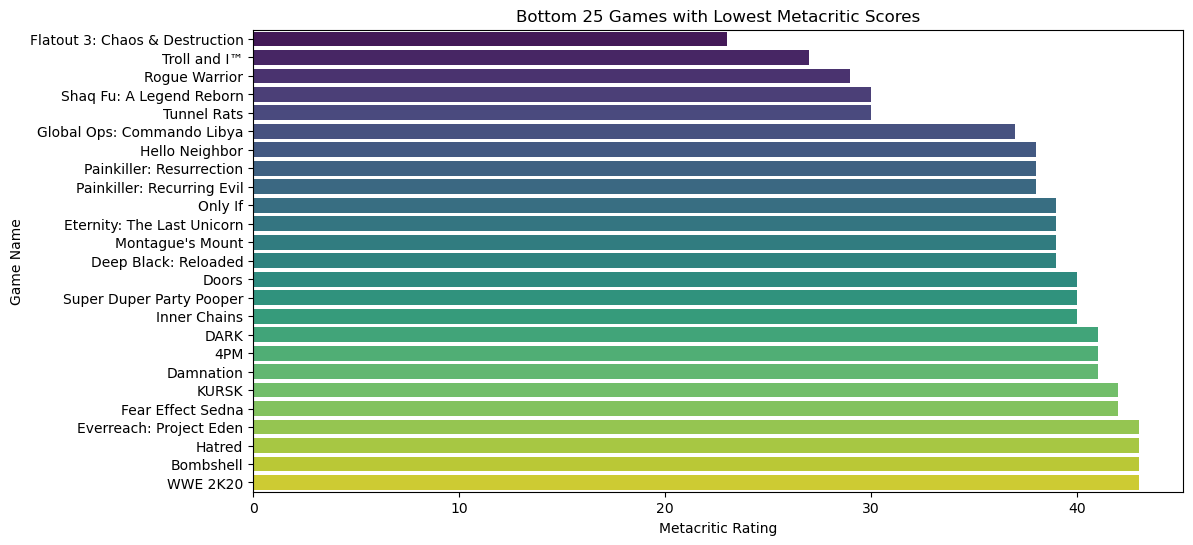

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\3918159980.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_25_reviewer, x='reviewer_rating', y='name', palette='viridis')


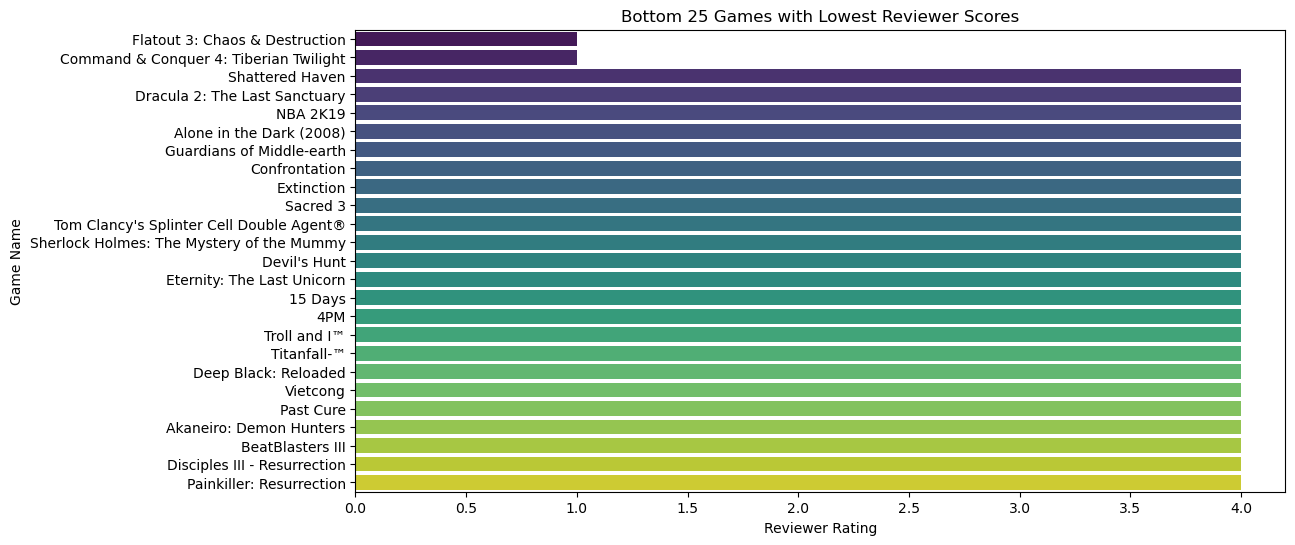

In [43]:
# Bottom 25 games with the lowest Metacritic scores
bottom_25_metacritic = sg_cleaned_df.nsmallest(25, 'metacritic_rating')

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_25_metacritic, x='metacritic_rating', y='name', palette='viridis')
plt.title('Bottom 25 Games with Lowest Metacritic Scores')
plt.xlabel('Metacritic Rating')
plt.ylabel('Game Name')
plt.show()

# Bottom 25 games with the lowest Reviewer scores
bottom_25_reviewer = sg_cleaned_df.nsmallest(25, 'reviewer_rating')

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_25_reviewer, x='reviewer_rating', y='name', palette='viridis')
plt.title('Bottom 25 Games with Lowest Reviewer Scores')
plt.xlabel('Reviewer Rating')
plt.ylabel('Game Name')
plt.show()

# Top 25 Metacritic and Reviewer Scores

In [44]:
# Top 25 games with the highest Metacritic scores
top_25_metacritic = sg_cleaned_df.nlargest(25, 'metacritic_rating')
top_25_metacritic['name'] = top_25_metacritic['name'].str.upper()
top_25_metacritic

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
20489,DISCO ELYSIUM - THE FINAL CUT,2019.0,97.0,8.0,14.174292,22.81,32.19,45.21,22.40,Story Rich
19127,HALF-LIFE,1998.0,96.0,9.0,27.847231,17.17,17.41,18.40,1.23,Story Rich
19129,HALF-LIFE 2,2004.0,96.0,9.0,39.586368,17.17,17.41,18.40,1.23,Horror
20432,BIOSHOCK™,2007.0,96.0,8.0,16.129739,12.12,15.62,22.49,10.37,Horror
61674,GRAND THEFT AUTO V,2015.0,96.0,8.0,6.071708,31.71,49.60,81.68,49.97,First-Person
22904,PORTAL 2,2011.0,95.0,9.0,79.589211,8.60,13.71,21.42,12.82,First-Person
60477,PERSONA 5 ROYAL,2022.0,95.0,9.0,34.569963,101.61,123.18,143.47,41.86,Story Rich
20390,ELDEN RING,2022.0,94.0,8.0,11.444008,57.43,99.67,133.35,75.92,Multiplayer
20461,GRAND THEFT AUTO: VICE CITY,2008.0,94.0,8.0,12.493386,17.97,25.76,41.15,23.18,Automobile Sim
20497,SID MEIER'S CIVILIZATION® IV,2006.0,94.0,8.0,17.333333,13.31,43.29,114.81,101.50,4X


In [62]:
# Top 25 games with the highest Reviewer scores based on Top 25 games in metacritic scores
top_25_reviewer_equal_to_top_25_meta_names = top_25_metacritic.iloc[:, [0,3]]
top_25_reviewer_equal_to_top_25_meta_names['name'] = top_25_reviewer_equal_to_top_25_meta_names['name'].str.upper()
top_25_reviewer_equal_to_top_25_meta_names

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\1126897121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_25_reviewer_equal_to_top_25_meta_names['name'] = top_25_reviewer_equal_to_top_25_meta_names['name'].str.upper()


,name,reviewer_rating
20489,DISCO ELYSIUM - THE FINAL CUT,8.0
19127,HALF-LIFE,9.0
19129,HALF-LIFE 2,9.0
20432,BIOSHOCK™,8.0
61674,GRAND THEFT AUTO V,8.0
22904,PORTAL 2,9.0
60477,PERSONA 5 ROYAL,9.0
20390,ELDEN RING,8.0
20461,GRAND THEFT AUTO: VICE CITY,8.0
20497,SID MEIER'S CIVILIZATION® IV,8.0


C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\1537896389.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_25_metacritic, x='metacritic_rating', y='name', palette='viridis')


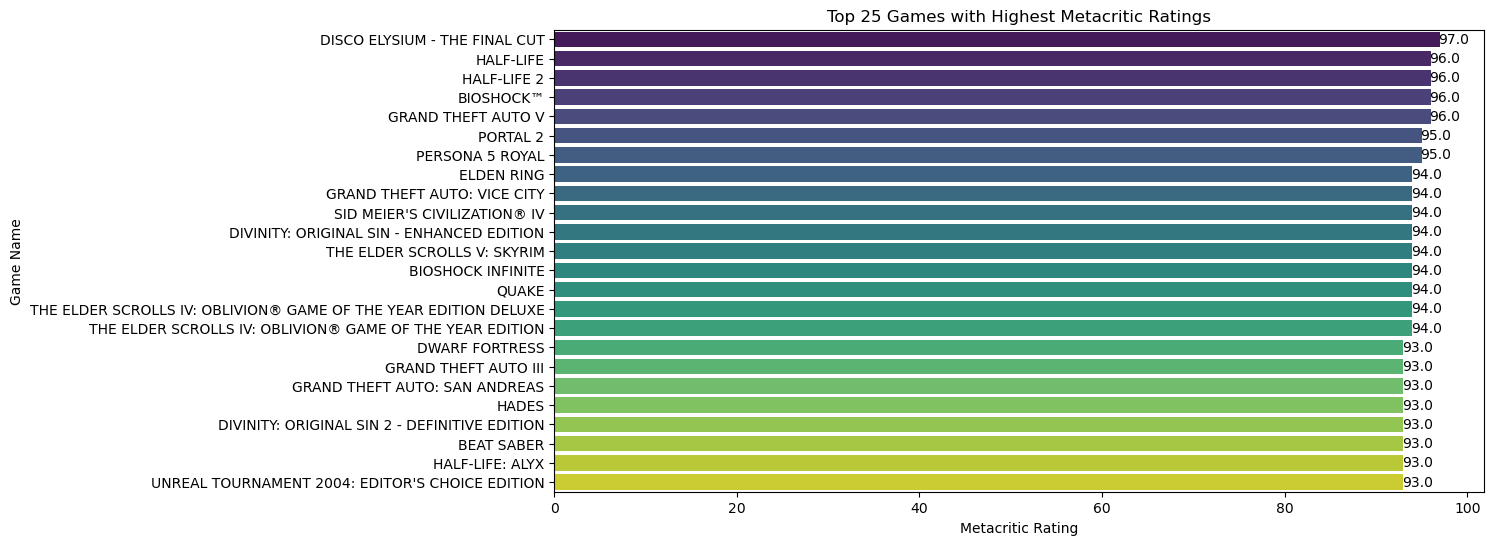

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\1537896389.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_25_reviewer, x='reviewer_rating', y='name', palette='viridis')


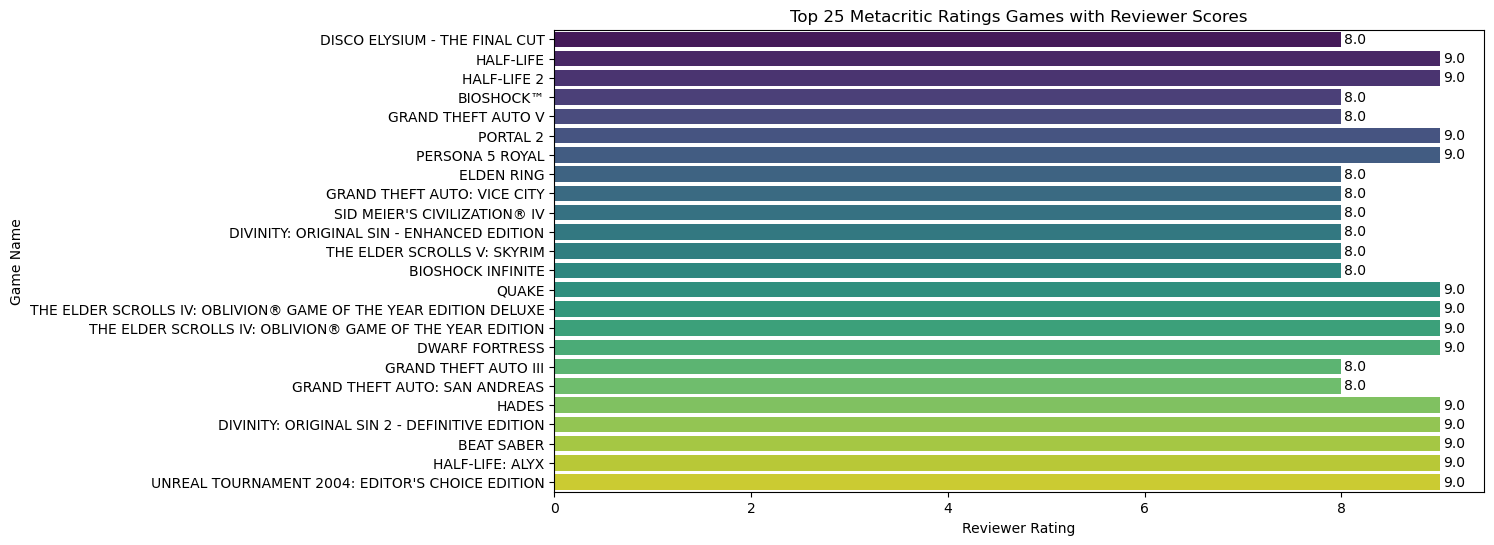

In [46]:
# Top 25 Games with highest metacritic and reviwer score w/ scores at end of each bar
def add_labels(df, x_col, y_col, ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_25_metacritic, x='metacritic_rating', y='name', palette='viridis')
add_labels(top_25_metacritic, 'metacritic_rating', 'name', ax)
plt.title('Top 25 Games with Highest Metacritic Ratings')
plt.xlabel('Metacritic Rating')
plt.ylabel('Game Name')
plt.show()

# Top 25 games with the highest Reviewer scores
top_25_reviewer = top_25_reviewer_equal_to_top_25_meta_names
# create a .csv from of the top 25 metacritic with the reviewer rating and replace with the nlargest(25, 'reviewer_rating')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_25_reviewer, x='reviewer_rating', y='name', palette='viridis')
add_labels(top_25_reviewer, 'reviewer_rating', 'name', ax)
plt.title('Top 25 Metacritic Ratings Games with Reviewer Scores')
plt.xlabel('Reviewer Rating')
plt.ylabel('Game Name')
plt.show()

# Bottom 25 Metacritic and Reviewer Scores

In [47]:
# Bottom 25 Games with lowest metacritic score
bottom_25_metacritic = sg_cleaned_df.nsmallest(25, 'metacritic_rating')
bottom_25_metacritic['name'] = bottom_25_metacritic['name'].str.upper()
bottom_25_metacritic

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
20993,FLATOUT 3: CHAOS & DESTRUCTION,2011.0,23.0,1.0,0.201999,5.46,7.43,16.82,11.36,Horror
46201,TROLL AND I™,2017.0,27.0,4.0,0.520000,9.28,12.83,17.12,7.84,Co-op Campaign
62483,ROGUE WARRIOR,2009.0,29.0,5.0,2.033097,2.25,3.19,5.21,2.96,Horror
54219,SHAQ FU: A LEGEND REBORN,2018.0,30.0,6.0,3.151515,3.03,3.19,3.96,0.93,Memes
62561,TUNNEL RATS,2009.0,30.0,4.0,0.538462,2.93,3.00,3.33,0.40,Memes
58066,GLOBAL OPS: COMMANDO LIBYA,2011.0,37.0,5.0,0.677273,4.45,4.47,5.02,0.57,Third-Person Shooter
23199,HELLO NEIGHBOR,2017.0,38.0,8.0,4.186718,9.22,16.01,17.70,8.48,Horror
62466,PAINKILLER: RESURRECTION,2009.0,38.0,4.0,0.364130,4.96,9.46,18.05,13.09,Horror
62468,PAINKILLER: RECURRING EVIL,2012.0,38.0,5.0,0.810945,3.55,4.20,4.96,1.41,Horror
36045,ONLY IF,2014.0,39.0,5.0,1.686486,1.76,2.23,2.55,0.79,Horror


In [48]:
# Bottom 25 games with the lowest Reviewer scores based on bottom 25 games in metacritic scores
bottom_25_reviewer_equal_to_bottom_25_meta_names = bottom_25_metacritic.iloc[:, [0,3]]
bottom_25_reviewer_equal_to_bottom_25_meta_names['name'] = bottom_25_reviewer_equal_to_bottom_25_meta_names['name'].str.upper()
bottom_25_reviewer_equal_to_bottom_25_meta_names


C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\2750545042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_25_reviewer_equal_to_bottom_25_meta_names['name'] = bottom_25_reviewer_equal_to_bottom_25_meta_names['name'].str.upper()


,name,reviewer_rating
20993,FLATOUT 3: CHAOS & DESTRUCTION,1.0
46201,TROLL AND I™,4.0
62483,ROGUE WARRIOR,5.0
54219,SHAQ FU: A LEGEND REBORN,6.0
62561,TUNNEL RATS,4.0
58066,GLOBAL OPS: COMMANDO LIBYA,5.0
23199,HELLO NEIGHBOR,8.0
62466,PAINKILLER: RESURRECTION,4.0
62468,PAINKILLER: RECURRING EVIL,5.0
36045,ONLY IF,5.0


C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\459632576.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_25_metacritic, x='metacritic_rating', y='name', palette='viridis')


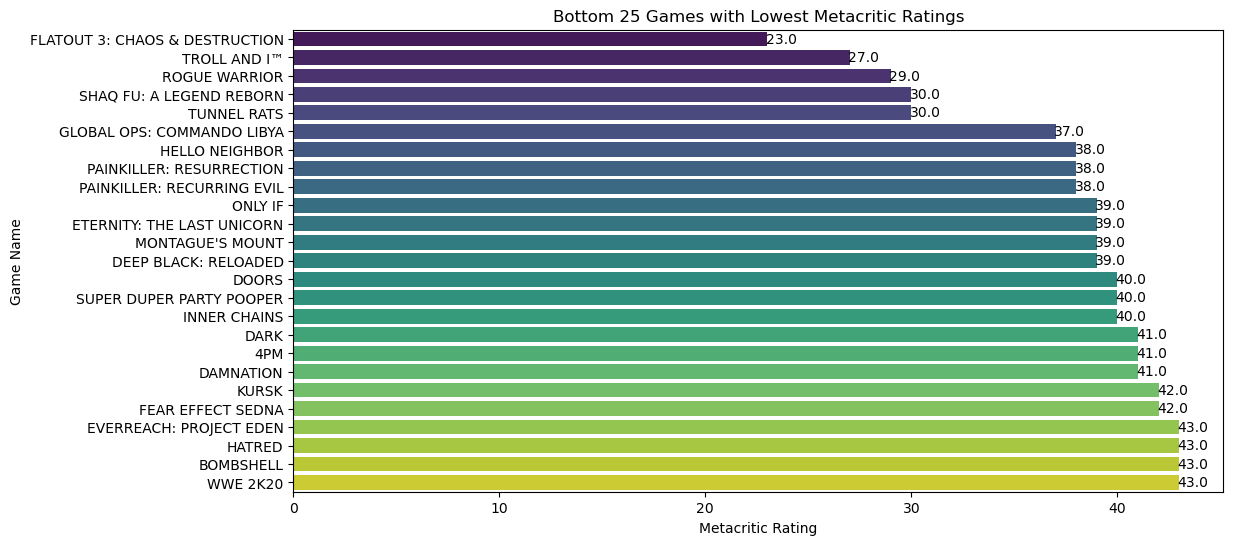

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\459632576.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_25_reviewer, x='reviewer_rating', y='name', palette='viridis')


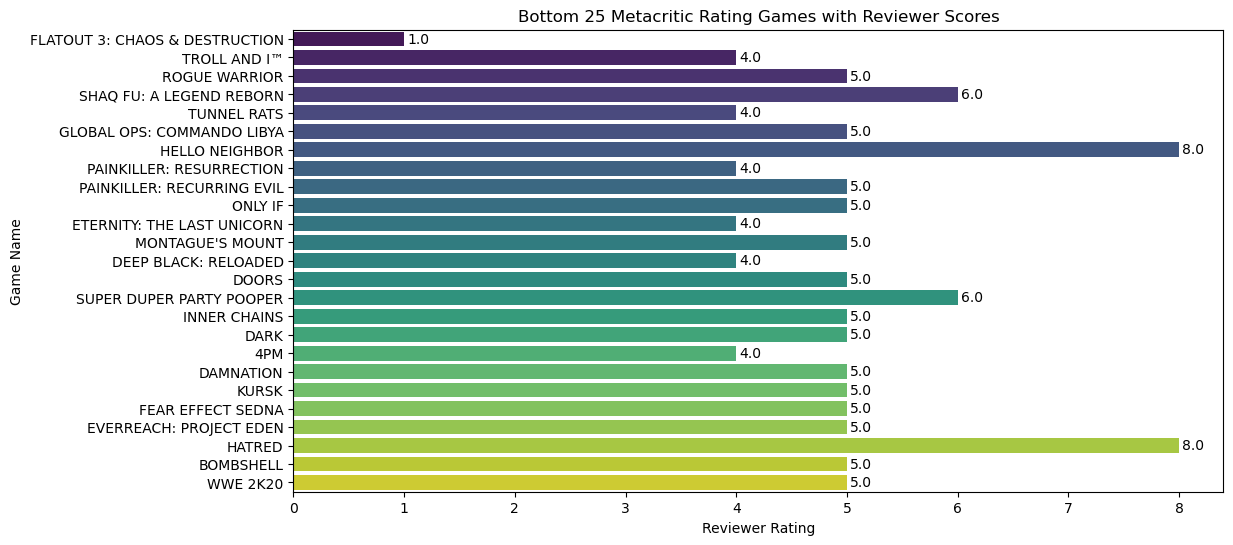

In [49]:
# Bottom 25 Games with lowest metacritic and reviwer scorse w/ scores at end of each bar
def add_labels(df, x_col, y_col, ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_25_metacritic, x='metacritic_rating', y='name', palette='viridis')
add_labels(bottom_25_metacritic, 'metacritic_rating', 'name', ax)
plt.title('Bottom 25 Games with Lowest Metacritic Ratings')
plt.xlabel('Metacritic Rating')
plt.ylabel('Game Name')
plt.show()

# Bottom 25 games with the lowest Reviewer scores
bottom_25_reviewer = bottom_25_reviewer_equal_to_bottom_25_meta_names

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_25_reviewer, x='reviewer_rating', y='name', palette='viridis')
add_labels(bottom_25_reviewer, 'reviewer_rating', 'name', ax)
plt.title('Bottom 25 Metacritic Rating Games with Reviewer Scores')
plt.xlabel('Reviewer Rating')
plt.ylabel('Game Name')
plt.show()



# Positivity Ratio Visualization w/ Top 25 Metacritic Scores  

In [50]:
sg_cleaned_df.head(5)

,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich
3,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror
4,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation
7,Baba Is You,2019.0,87.0,9.0,49.397183,6.84,19.28,46.70,39.86,Horror
11,Human Resource Machine,2015.0,78.0,8.0,15.220833,4.18,7.57,9.52,5.34,Automation


In [51]:
# sg_ratio_metacritic_df: Data Frame of Positivity_Ratio and Metacritic Scores
# Top 25 games with the highest Metacritic scores
top_25_metacritic = sg_cleaned_df.nlargest(25, 'metacritic_rating')
top_25_metacritic['name'] = top_25_metacritic['name'].str.upper()
sg_ratio_metacritic_top_25_df = top_25_metacritic.iloc[:, [0, 2, 4]]
sg_ratio_metacritic_top_25_df


,name,metacritic_rating,positivity_ratio
20489,DISCO ELYSIUM - THE FINAL CUT,97.0,14.174292
19127,HALF-LIFE,96.0,27.847231
19129,HALF-LIFE 2,96.0,39.586368
20432,BIOSHOCK™,96.0,16.129739
61674,GRAND THEFT AUTO V,96.0,6.071708
22904,PORTAL 2,95.0,79.589211
60477,PERSONA 5 ROYAL,95.0,34.569963
20390,ELDEN RING,94.0,11.444008
20461,GRAND THEFT AUTO: VICE CITY,94.0,12.493386
20497,SID MEIER'S CIVILIZATION® IV,94.0,17.333333


C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\2249764670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), x='positivity_ratio', y='name', palette='viridis')


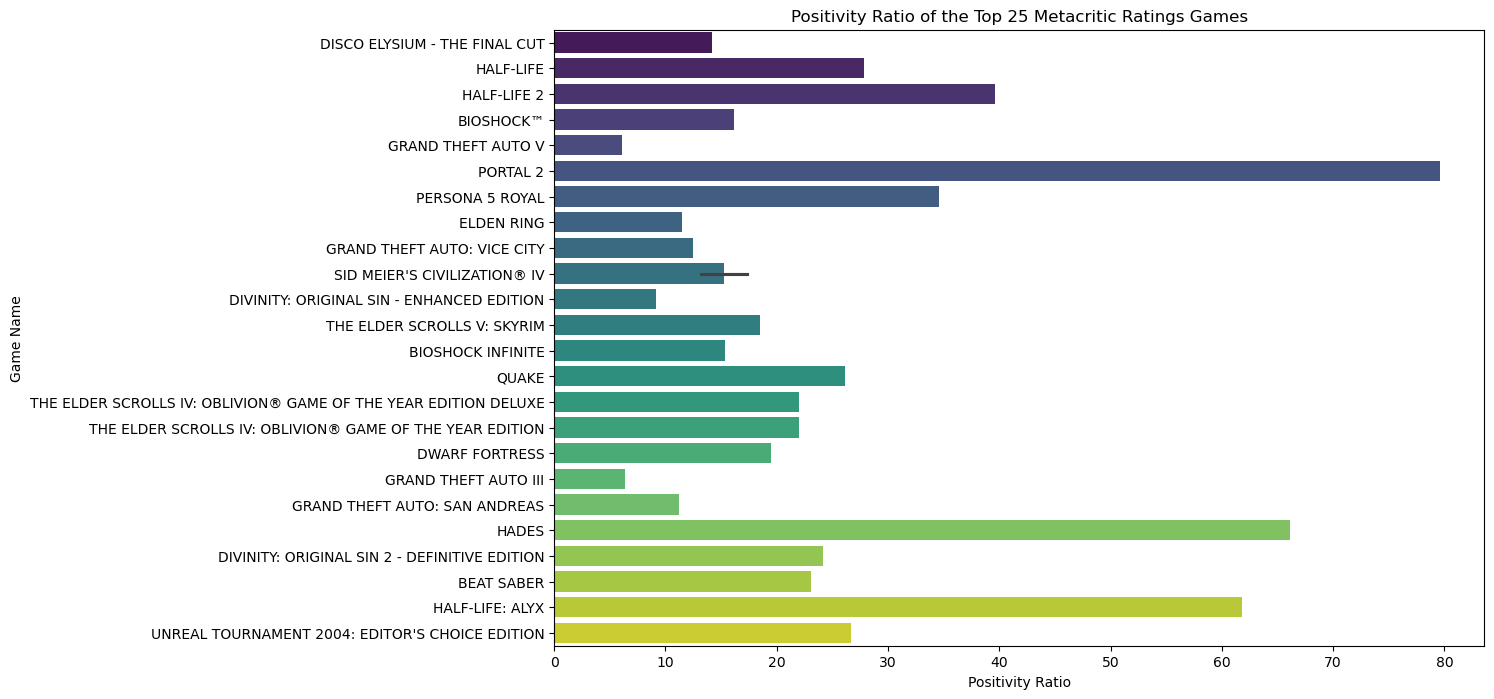

In [52]:
# Just shows positivity ratio for Top 25 games
# sg_ratio_metacritic_df Top 25: Visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), x='positivity_ratio', y='name', palette='viridis')
ax.set_title('Positivity Ratio of the Top 25 Metacritic Ratings Games')
ax.set_xlabel('Positivity Ratio')
ax.set_ylabel('Game Name')
plt.show()

# Positivity Ratio & Top 25 Metacritic Rating Games - Visual  

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\4270718719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), x='name', y='positivity_ratio', palette='viridis')
C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\4270718719.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), x='name', y='metacritic_rating', palette='Reds', alpha=0.6, ax=ax2)


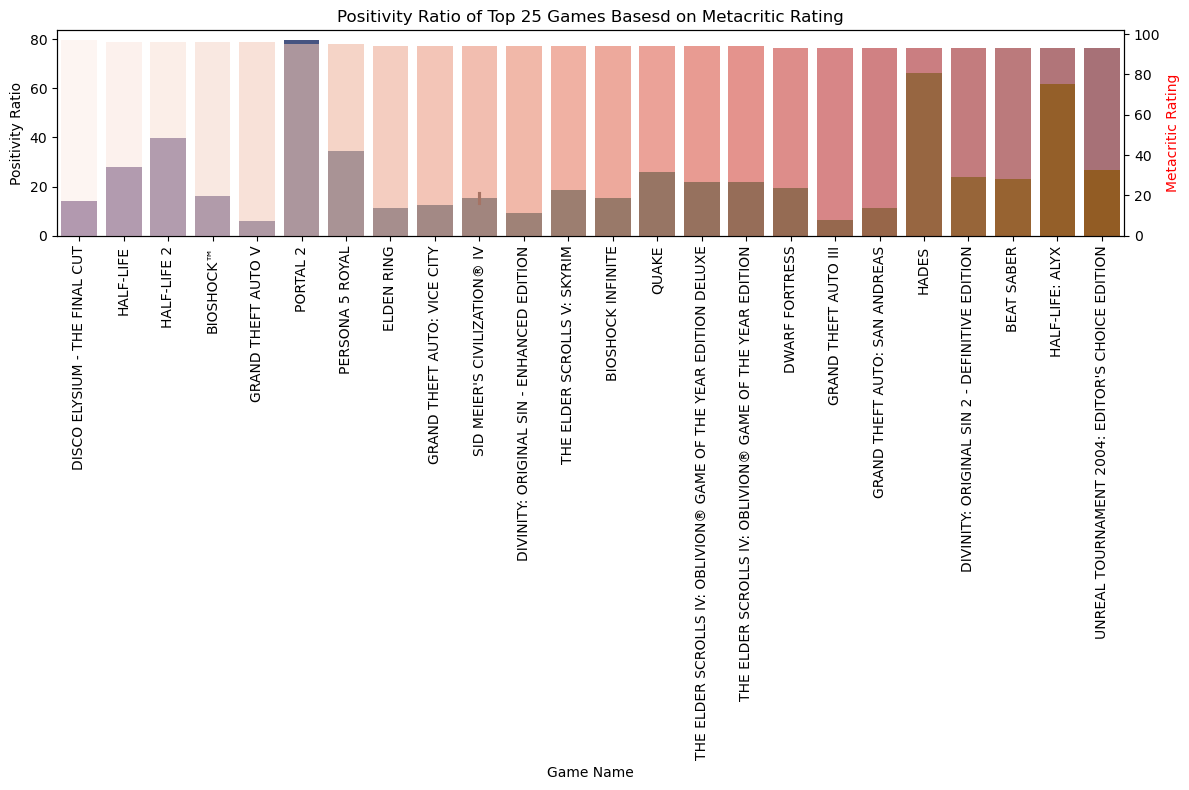

In [53]:
# Positivity Ratio & Top 25 Metacritic Rating Games: Visualization - Vertical
# Vertical Bars
sg_ratio_metacritic_top_25_df

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), x='name', y='positivity_ratio', palette='viridis')
ax.set_title('Positivity Ratio of Top 25 Games Basesd on Metacritic Rating')
ax.set_xlabel('Game Name')
plt.xticks(rotation = 90)
ax.set_ylabel('Positivity Ratio')

# Creates a second y-axis sharing the same x-axis
ax2 = ax.twinx()

# Plot data for second y-axis
ax2 = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), x='name', y='metacritic_rating', palette='Reds', alpha=0.6, ax=ax2)
ax2.set_ylabel('Metacritic Rating', color='red')

# Adjust the plot to make sure both y-axes are visible
plt.tight_layout()
plt.show()


C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\1492762911.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), y='name', x='positivity_ratio', palette='viridis', orient='h')


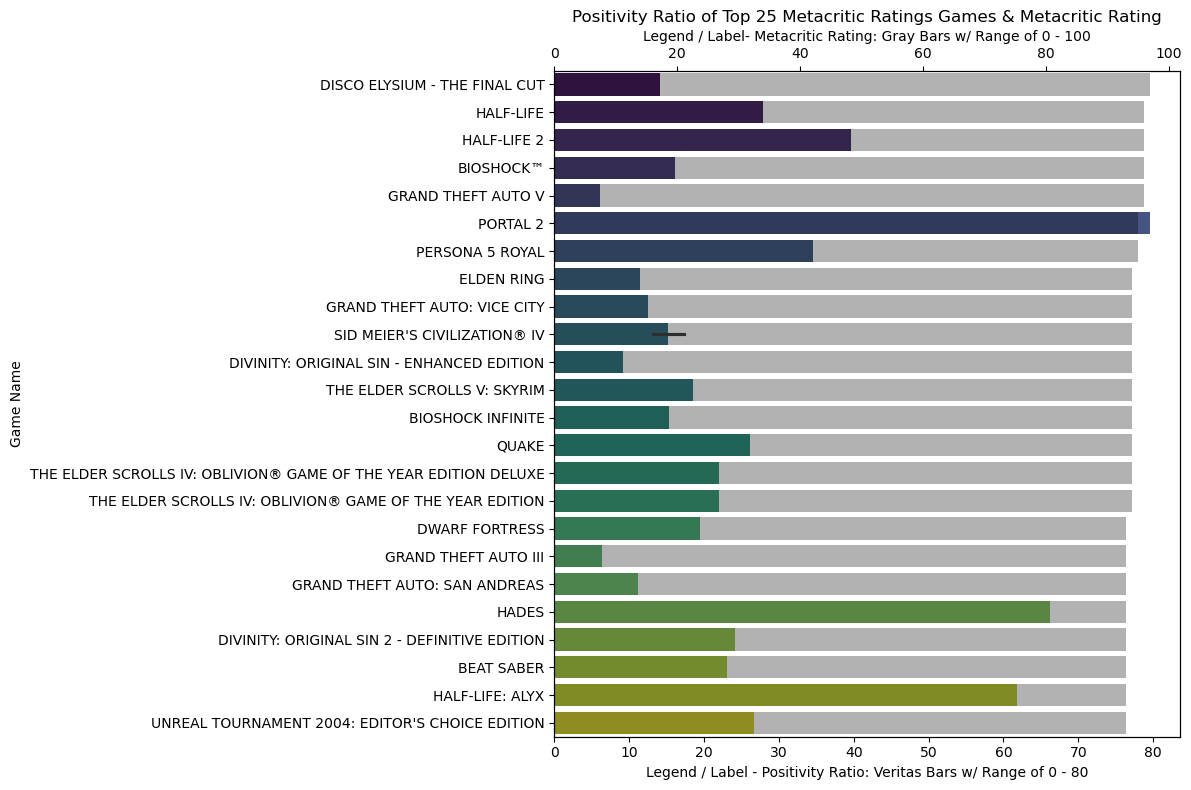

In [54]:
# Positivity Ratio & Top 25 Metacritic Rating Games: Visualization - Horizontal
# Horizontal Bars

plt.figure(figsize=(12, 8))

# Plot data for the first y-axis
ax = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), y='name', x='positivity_ratio', palette='viridis', orient='h')
ax.set_title('Positivity Ratio of Top 25 Metacritic Ratings Games & Metacritic Rating')
ax.set_ylabel('Game Name')
ax.set_xlabel('Legend / Label - Positivity Ratio: Veritas Bars w/ Range of 0 - 80')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Create a second x-axis sharing the same y-axis
ax2 = ax.twiny()

# Plot data for the second x-axis
ax2 = sns.barplot(data=sg_ratio_metacritic_top_25_df.head(25), y='name', x='metacritic_rating', color = 'black', alpha=0.3, orient='h', ax=ax2)
ax2.set_xlabel('Legend / Label- Metacritic Rating: Gray Bars w/ Range of 0 - 100', color='black')

# Adjust the plot to make sure both x-axes are visible
plt.tight_layout()
plt.show()

# Positivity Ratio Visualization w/ Bottom 25 Metacritic Scores

In [55]:
# sg_ratio_metacritic_df  Bottom 25: Sorted by positivity ratio; ascending = True;
# Bottom 25 Games with lowest metacritic score
bottom_25_metacritic = sg_cleaned_df.nsmallest(25, 'metacritic_rating')
bottom_25_metacritic['name'] = bottom_25_metacritic['name'].str.upper()
sg_ratio_metacritic_bottom_25_df = bottom_25_metacritic.iloc[:, [0, 2, 4]]
sg_ratio_metacritic_bottom_25_df

,name,metacritic_rating,positivity_ratio
20993,FLATOUT 3: CHAOS & DESTRUCTION,23.0,0.201999
46201,TROLL AND I™,27.0,0.520000
62483,ROGUE WARRIOR,29.0,2.033097
54219,SHAQ FU: A LEGEND REBORN,30.0,3.151515
62561,TUNNEL RATS,30.0,0.538462
58066,GLOBAL OPS: COMMANDO LIBYA,37.0,0.677273
23199,HELLO NEIGHBOR,38.0,4.186718
62466,PAINKILLER: RESURRECTION,38.0,0.364130
62468,PAINKILLER: RECURRING EVIL,38.0,0.810945
36045,ONLY IF,39.0,1.686486


C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\2129415677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sg_ratio_metacritic_bottom_25_df.head(25), x='positivity_ratio', y='name', palette='viridis')


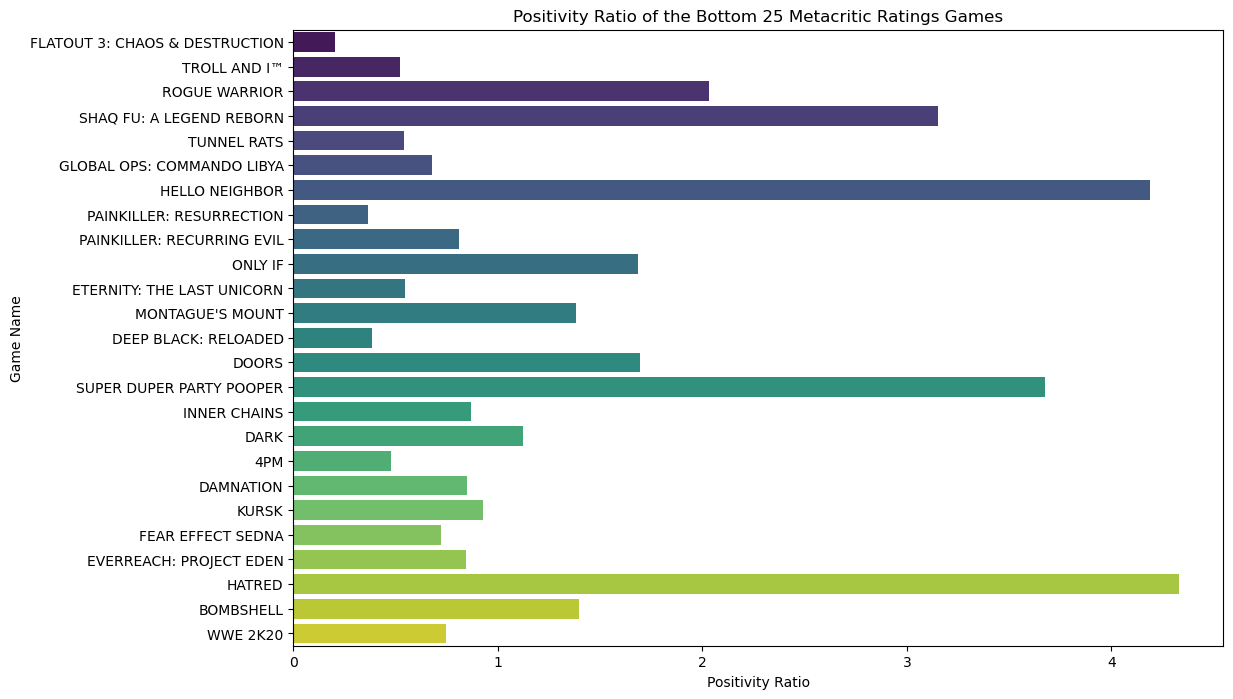

In [56]:
# Just shows positivity ratio for Top 25 games
# sg_ratio_metacritic_df Top 25: Visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sg_ratio_metacritic_bottom_25_df.head(25), x='positivity_ratio', y='name', palette='viridis')
ax.set_title('Positivity Ratio of the Bottom 25 Metacritic Ratings Games')
ax.set_xlabel('Positivity Ratio')
ax.set_ylabel('Game Name')
plt.show()

C:\Users\jerem\AppData\Local\Temp\ipykernel_4376\903733358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sg_ratio_metacritic_bottom_25_df.head(25), y='name', x='positivity_ratio', palette='viridis', orient='h')


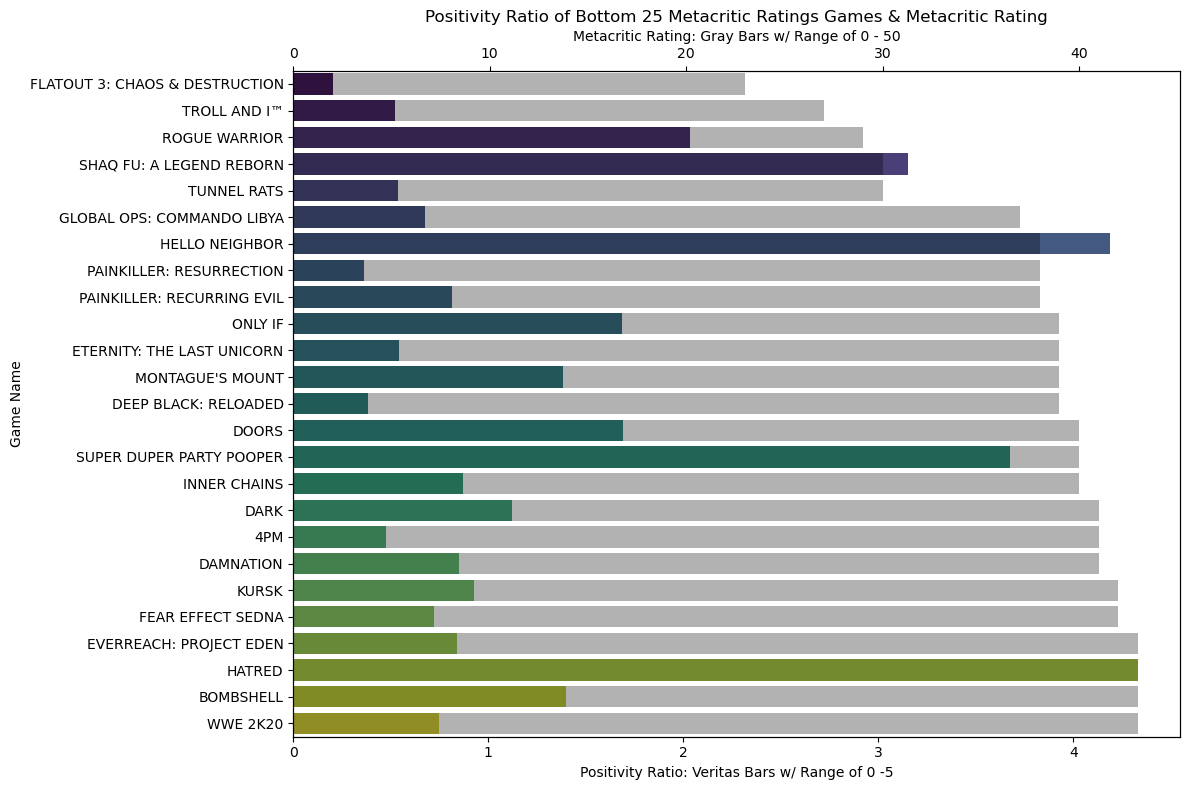

In [57]:
# Positivity Ratio & Bottom 25 Metacritic Rating Games: Visualization - Horizontal
# Horizontal Bars

plt.figure(figsize=(12, 8))

# Plot data for the first y-axis
ax = sns.barplot(data=sg_ratio_metacritic_bottom_25_df.head(25), y='name', x='positivity_ratio', palette='viridis', orient='h')
ax.set_title('Positivity Ratio of Bottom 25 Metacritic Ratings Games & Metacritic Rating')
ax.set_ylabel('Game Name')
ax.set_xlabel('Positivity Ratio: Veritas Bars w/ Range of 0 -5')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Create a second x-axis sharing the same y-axis
ax2 = ax.twiny()

# Plot data for the second x-axis
ax2 = sns.barplot(data=sg_ratio_metacritic_bottom_25_df.head(25), y='name', x='metacritic_rating', color = 'black', alpha=0.3, orient='h', ax=ax2)
ax2.set_xlabel('Metacritic Rating: Gray Bars w/ Range of 0 - 50', color='black')

# Adjust the plot to make sure both x-axes are visible
plt.tight_layout()
plt.show()

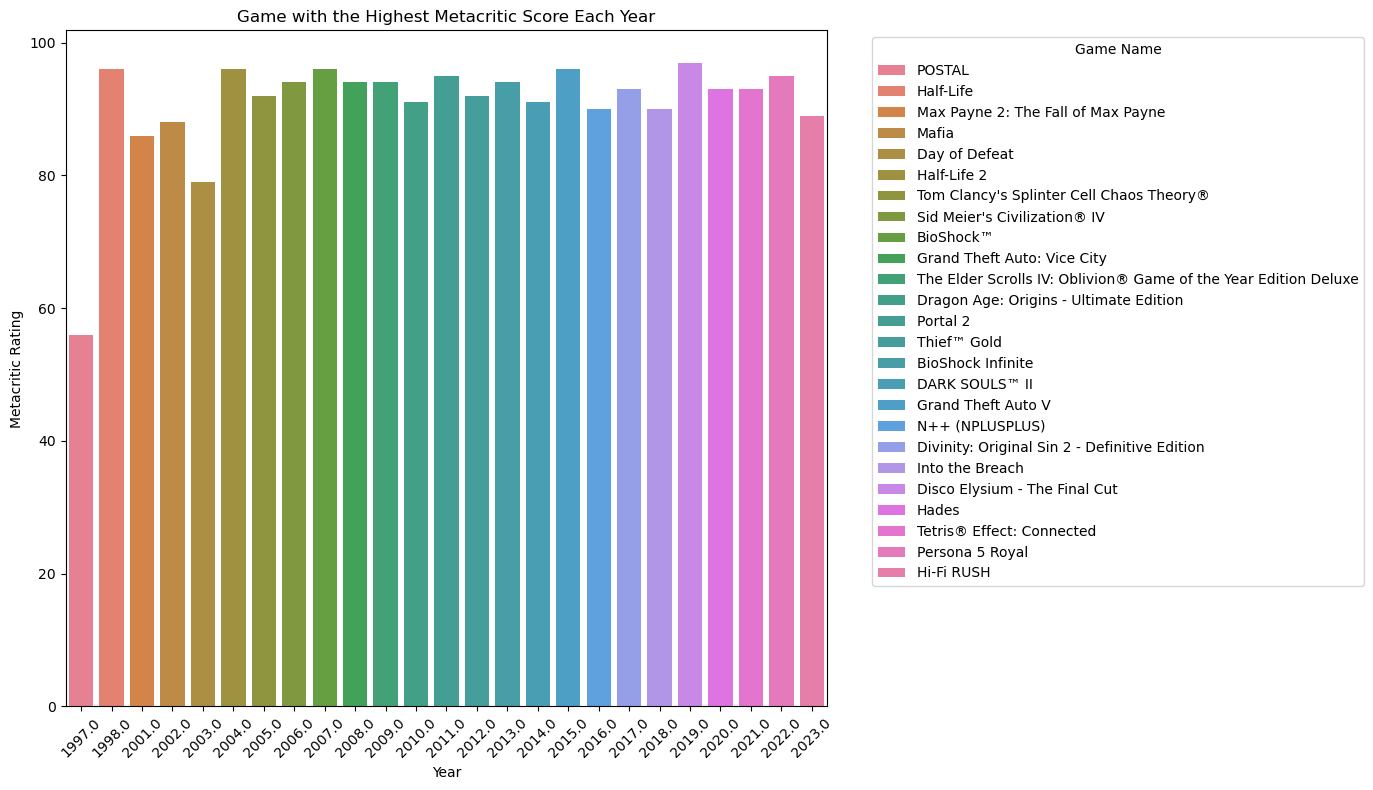

In [58]:
# Find the game with the highest Metacritic score Each Year - Seaborn
highest_metacritic_per_year = sg_cleaned_df.loc[sg_cleaned_df.groupby('year')['metacritic_rating'].idxmax()]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=highest_metacritic_per_year, x='year', y='metacritic_rating', hue='name', dodge=False)
plt.title('Game with the Highest Metacritic Score Each Year')
plt.xlabel('Year')
plt.ylabel('Metacritic Rating')
plt.xticks(rotation=45)
plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

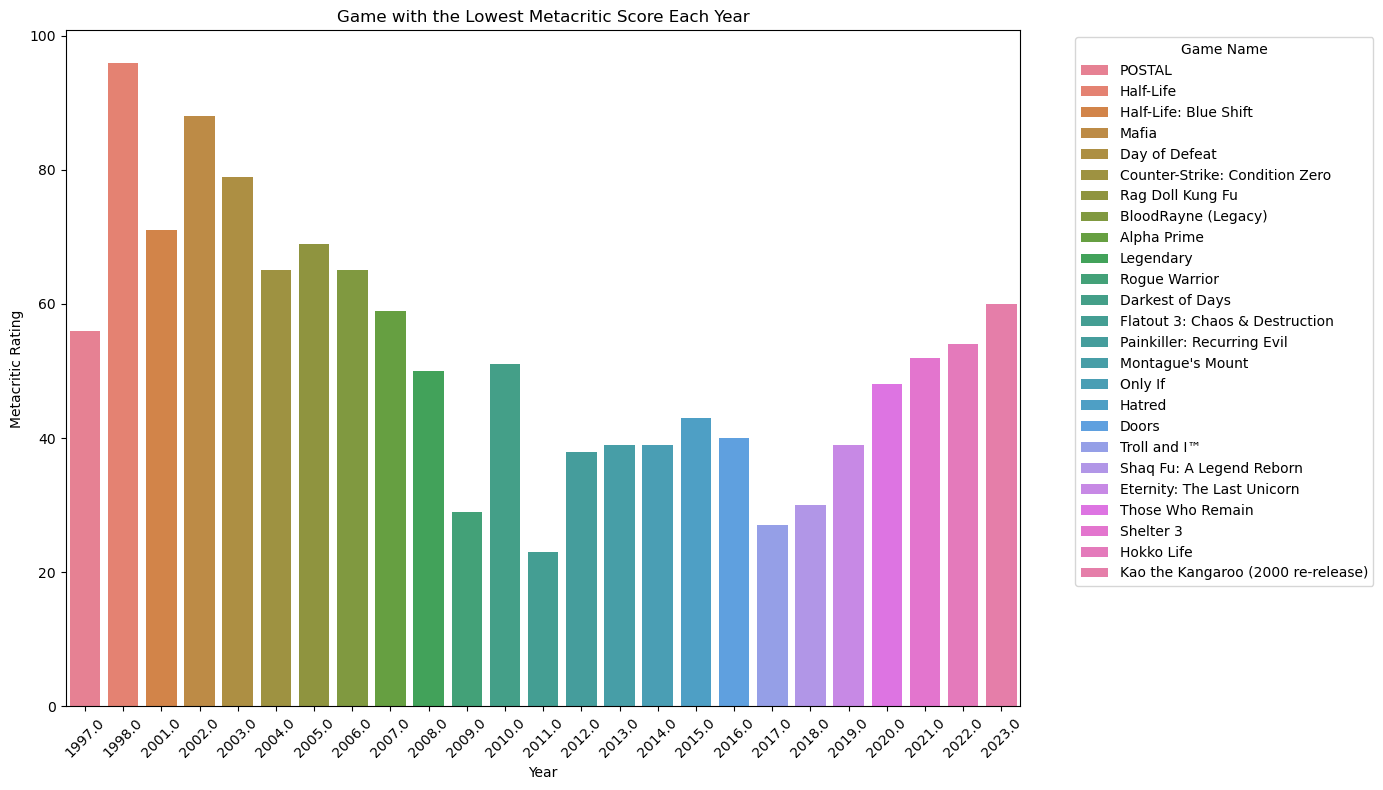

In [59]:
# Find the game with the lowest Metacritic score Each Year - Seaborn
lowest_metacritic_per_year = sg_cleaned_df.loc[sg_cleaned_df.groupby('year')['metacritic_rating'].idxmin()]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=lowest_metacritic_per_year, x='year', y='metacritic_rating', hue='name', dodge=False)
plt.title('Game with the Lowest Metacritic Score Each Year')
plt.xlabel('Year')
plt.ylabel('Metacritic Rating')
plt.xticks(rotation=45)
plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

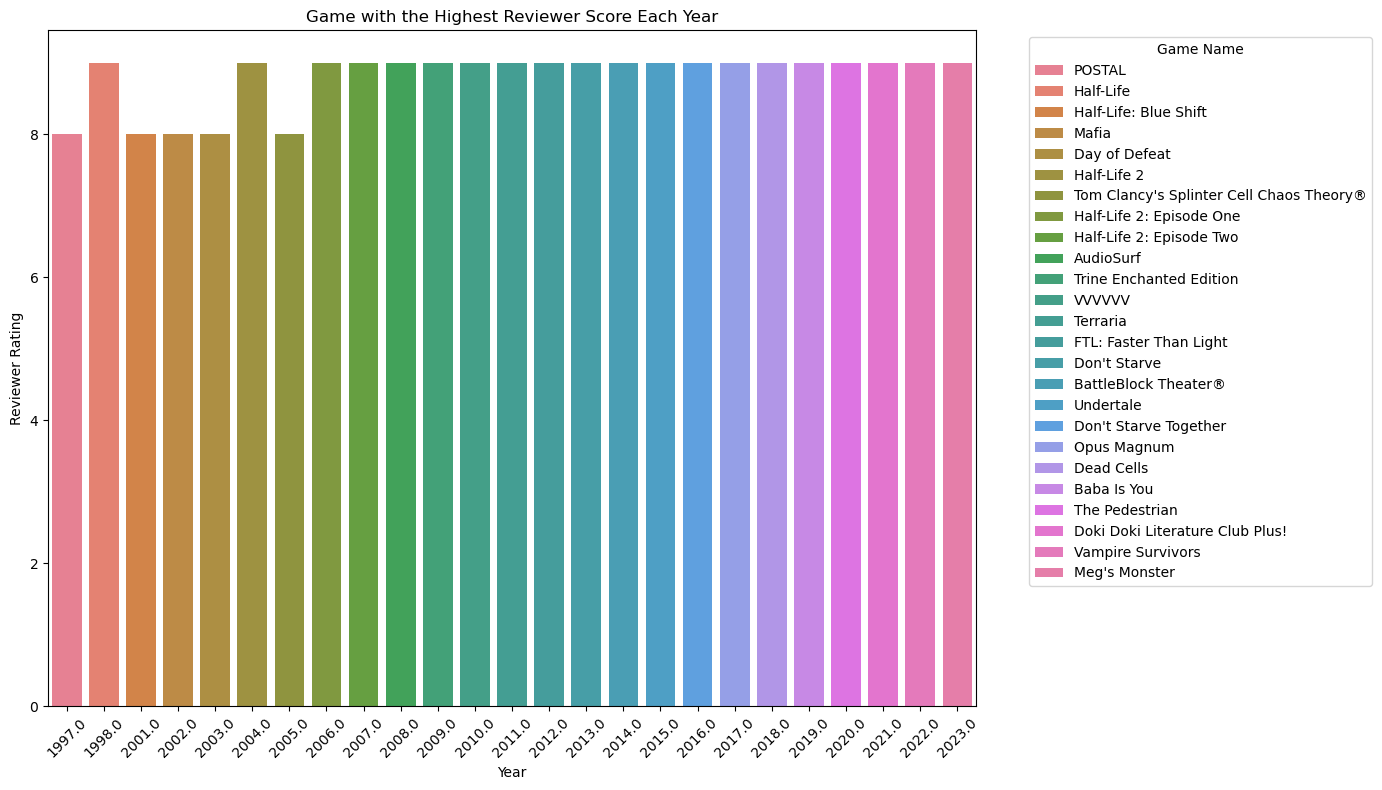

In [60]:
# Find the game with the highest reviewer score Each Year - Seaborn
highest_reviewer_per_year = sg_cleaned_df.loc[sg_cleaned_df.groupby('year')['reviewer_rating'].idxmax()]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=highest_reviewer_per_year, x='year', y='reviewer_rating', hue='name', dodge=False)
plt.title('Game with the Highest Reviewer Score Each Year')
plt.xlabel('Year')
plt.ylabel('Reviewer Rating')
plt.xticks(rotation=45)
plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

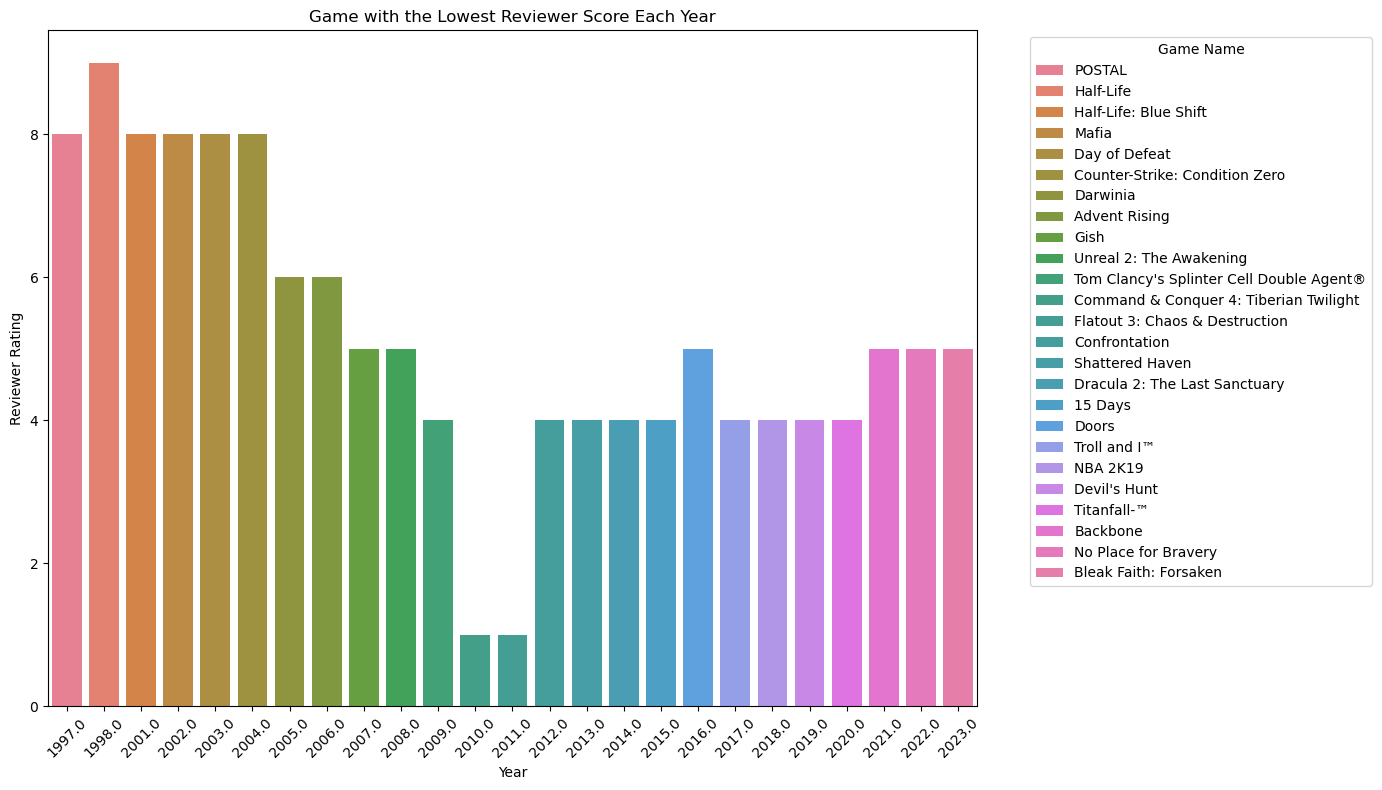

In [61]:
# Find the game with the lowest reviewer score Each Year - Seaborn
lowest_reviewer_per_year = sg_cleaned_df.loc[sg_cleaned_df.groupby('year')['reviewer_rating'].idxmin()]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=lowest_reviewer_per_year, x='year', y='reviewer_rating', hue='name', dodge=False)
plt.title('Game with the Lowest Reviewer Score Each Year')
plt.xlabel('Year')
plt.ylabel('Reviewer Rating')
plt.xticks(rotation=45)
plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()